<a href="https://colab.research.google.com/github/medwedizaa/EDA/blob/main/Titanic_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
data = pd.read_csv('sample_data/train.csv')

In [97]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [99]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning

In [101]:
data_cleaned = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [102]:
sum(data_cleaned['Parch'] == 0) / len(data_cleaned)

0.7609427609427609

In [103]:
data_cleaned = data_cleaned.drop(['Parch'], axis = 1, )

In [104]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [105]:
data_cleaned.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Fare,0
Embarked,2


In [106]:
data_cleaned = data_cleaned.dropna(axis=0, subset=['Age'])
data_cleaned = data_cleaned.dropna(axis=0, subset=['Embarked'])

In [107]:
data_cleaned.shape

(712, 7)

In [108]:
data_cleaned.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Fare,0
Embarked,0


In [109]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [110]:
data_cleaned['Sex'] = np.where(data_cleaned['Sex'] == 'male', 0, 1)

In [111]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,S
1,1,1,1,38.0,1,71.2833,C
2,1,3,1,26.0,0,7.9250,S
3,1,1,1,35.0,1,53.1000,S
4,0,3,0,35.0,0,8.0500,S


In [112]:
data_cleaned['SibSp'].value_counts()

,count
SibSp,
0,469
1,183
2,25
4,18
3,12
5,5


In [113]:
data_cleaned['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [114]:
dumies = pd.get_dummies(data_cleaned['Embarked'], drop_first=True)

In [115]:
dumies

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
885,True,False
886,False,True
887,False,True
889,False,False


In [116]:
data_cleaned['Q'] = np.where(dumies['Q'], 1, 0)
data_cleaned['S'] = np.where(dumies['S'], 1, 0)
data_cleaned = data_cleaned.drop('Embarked', axis=1)

In [117]:

data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Q,S
0,0,3,0,22.0,1,7.2500,0,1
1,1,1,1,38.0,1,71.2833,0,0
2,1,3,1,26.0,0,7.9250,0,1
3,1,1,1,35.0,1,53.1000,0,1
4,0,3,0,35.0,0,8.0500,0,1


In [118]:
from collections import Counter

In [119]:
data_cleaned['SibSp'].value_counts()

,count
SibSp,
0,469
1,183
2,25
4,18
3,12
5,5


# Finding Outliers


In [120]:
data_cleaned.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Q,S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,34.567251,0.039326,0.778090
std,0.491139,0.836854,0.481420,14.492933,0.930692,52.938648,0.194506,0.415823
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,8.050000,0.000000,1.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,15.645850,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,33.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,512.329200,1.000000,1.000000


<Axes: xlabel='Fare'>

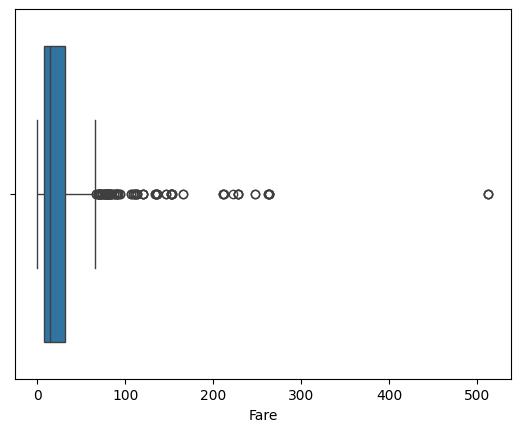

In [121]:
sns.boxplot(x=data['Fare'])

In [122]:
Q1 = data_cleaned['Fare'].quantile(0.25)
Q3 = data_cleaned['Fare'].quantile(0.75)
#Q1 = data_cleaned.quantile(0.25)
#Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

24.95


In [123]:
(data_cleaned['Fare'] < Q1 - 1.5*IQR).sum()

np.int64(0)

In [124]:
data_cleaned = data_cleaned[~((data_cleaned['Fare'] < Q1 - 1.5*IQR) | (data_cleaned['Fare'] > Q3 + 1.5*IQR))]

In [125]:
data_cleaned.shape

(617, 8)

<Axes: xlabel='Fare'>

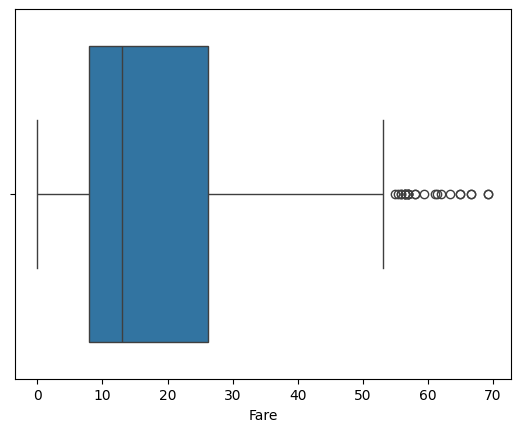

In [126]:
sns.boxplot(x=data_cleaned['Fare'])

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
targets = data_cleaned['Survived']
features = data_cleaned.drop('Survived', axis=1)

In [130]:
scaled_features = scaler.fit_transform(features)

In [132]:
scaled_features

array([[1.        , 0.        , 0.27117366, ..., 0.1046176 , 0.        ,
        1.        ],
       [1.        , 1.        , 0.32143755, ..., 0.11435786, 0.        ,
        1.        ],
       [0.        , 1.        , 0.43453129, ..., 0.76623377, 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.23347575, ..., 0.43290043, 0.        ,
        1.        ],
       [0.        , 0.        , 0.32143755, ..., 0.43290043, 0.        ,
        0.        ],
       [1.        , 0.        , 0.39683338, ..., 0.11183261, 1.        ,
        0.        ]])